In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Data processing

In [2]:
df = pd.read_csv("./car.csv", header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.columns = ["buying", "maintain", "doors", "seats", "cargo", "safety", "worth"]
df.head()

,buying,maintain,doors,seats,cargo,safety,worth
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.describe()

,buying,maintain,doors,seats,cargo,safety,worth
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maintain  1728 non-null   object
 2   doors     1728 non-null   object
 3   seats     1728 non-null   object
 4   cargo     1728 non-null   object
 5   safety    1728 non-null   object
 6   worth     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
for i in df.columns:
    print(i, df[i].unique())

buying ['vhigh' 'high' 'med' 'low']
maintain ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
seats ['2' '4' 'more']
cargo ['small' 'med' 'big']
safety ['low' 'med' 'high']
worth ['unacc' 'acc' 'vgood' 'good']


=> Data Description: There are 1728 datapoints. None of those contain null data

The datatype of all columns are object. Normalize to Int

In [7]:
import category_encoders
encoder = category_encoders.OrdinalEncoder(cols=["buying", "maintain", "doors", "seats", "cargo", "safety", "worth"])
df = encoder.fit_transform(df)

/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
/miniconda3/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [8]:
print(df.dtypes)

buying      int64
maintain    int64
doors       int64
seats       int64
cargo       int64
safety      int64
worth       int64
dtype: object


In [9]:
for i in df.columns:
    print(i, df[i].unique())

buying [1 2 3 4]
maintain [1 2 3 4]
doors [1 2 3 4]
seats [1 2 3]
cargo [1 2 3]
safety [1 2 3]
worth [1 2 3 4]


In [10]:
df.head(15)

,buying,maintain,doors,seats,cargo,safety,worth
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
5,1,1,1,1,2,3,1
6,1,1,1,1,3,1,1
7,1,1,1,1,3,2,1
8,1,1,1,1,3,3,1
9,1,1,1,2,1,1,1


In [11]:
print(df.loc[[1528]])

      buying  maintain  doors  seats  cargo  safety  worth
1528       4         3      1      2      3       2      4


Prepare features and labels

In [12]:
X = df.drop(["worth"], axis=1)
y = df["worth"]
print(X.shape)
print(y.shape)

(1728, 6)
(1728,)


Train - Validate split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1382, 6)
(1382,)
(346, 6)
(346,)


Train - Validate - Test split

In [14]:
X_train_2, X_rem, y_train_2, y_rem = train_test_split(X, y, test_size = 0.4, random_state = 42)
print(X_train_2.shape)
print(y_train_2.shape)
print(X_rem.shape)
print(y_rem.shape)

(1036, 6)
(1036,)
(692, 6)
(692,)


In [15]:
X_val_2, X_test, y_val_2, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42)
print(X_val_2.shape)
print(y_val_2.shape)
print(X_test.shape)
print(y_test.shape)

(346, 6)
(346,)
(346, 6)
(346,)


# Logistic Regression

Fit and Validate 80-20 set

In [16]:
logi_regr = LogisticRegression()

In [17]:
logi_regr.fit(X_train, y_train)

y_pred_train = logi_regr.predict(X_train)
acc_train = round(accuracy_score(y_train, y_pred_train), 3)
f1_train = round(f1_score(y_train, y_pred_train, average = "weighted"), 3)

y_pred_val = logi_regr.predict(X_val)
acc_val = round(accuracy_score(y_val, y_pred_val), 3)
f1_val = round(f1_score(y_val, y_pred_val, average = "weighted"), 3)

print("training accuracy: ", acc_train)
print("training f1_score: ", f1_train)
print("validate accuracy: ", acc_val)
print("validate f1_score: ", f1_val)

training accuracy:  0.83
training f1_score:  0.825
validate accuracy:  0.815
validate f1_score:  0.808


/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fit and Validate 60-20-20 set

In [18]:
logi_regr.fit(X_train_2, y_train_2)

y_pred_train = logi_regr.predict(X_train_2)
acc_train = round(accuracy_score(y_train_2, y_pred_train), 3)
f1_train = round(f1_score(y_train_2, y_pred_train, average = "weighted"), 3)

y_pred_val = logi_regr.predict(X_val_2)
acc_val = round(accuracy_score(y_val_2, y_pred_val), 3)
f1_val = round(f1_score(y_val_2, y_pred_val, average = "weighted"), 3)

print("training accuracy: ", acc_train)
print("training f1_score: ", f1_train)
print("validate accuracy: ", acc_val)
print("validate f1_score: ", f1_val)

training accuracy:  0.819
training f1_score:  0.813
validate accuracy:  0.824
validate f1_score:  0.822


/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [19]:
depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

train_scores, val_scores = [], []

for d in depth:
    decision_tree = DecisionTreeClassifier(max_depth = d)
    decision_tree.fit(X_train, y_train)
    
    y_pred_train = decision_tree.predict(X_train)
    acc_train = round(accuracy_score(y_train, y_pred_train), 3)
    train_scores.append(accuracy_score(y_train, y_pred_train))
    f1_train = round(f1_score(y_train, y_pred_train, average = "weighted"), 3)
    
    y_pred_val = decision_tree.predict(X_val)
    acc_val = round(accuracy_score(y_val, y_pred_val), 3)
    val_scores.append(accuracy_score(y_val, y_pred_val))
    f1_val = round(f1_score(y_val, y_pred_val, average = "weighted"), 3)
    
    print(f"Depth: {d} | Accuracy Train: {acc_train} | f1_score Train: {f1_train} | Accuracy Val: {acc_val} | f1_score Val: {f1_val}")
    

Depth: 1 | Accuracy Train: 0.705 | f1_score Train: 0.584 | Accuracy Val: 0.679 | f1_score Val: 0.549
Depth: 2 | Accuracy Train: 0.773 | f1_score Train: 0.764 | Accuracy Val: 0.798 | f1_score Val: 0.781
Depth: 3 | Accuracy Train: 0.787 | f1_score Train: 0.752 | Accuracy Val: 0.812 | f1_score Val: 0.774
Depth: 4 | Accuracy Train: 0.853 | f1_score Train: 0.85 | Accuracy Val: 0.841 | f1_score Val: 0.84
Depth: 5 | Accuracy Train: 0.867 | f1_score Train: 0.855 | Accuracy Val: 0.89 | f1_score Val: 0.879
Depth: 6 | Accuracy Train: 0.933 | f1_score Train: 0.936 | Accuracy Val: 0.939 | f1_score Val: 0.943
Depth: 7 | Accuracy Train: 0.941 | f1_score Train: 0.941 | Accuracy Val: 0.922 | f1_score Val: 0.922
Depth: 8 | Accuracy Train: 0.983 | f1_score Train: 0.983 | Accuracy Val: 0.948 | f1_score Val: 0.954
Depth: 9 | Accuracy Train: 0.988 | f1_score Train: 0.988 | Accuracy Val: 0.954 | f1_score Val: 0.955
Depth: 10 | Accuracy Train: 0.996 | f1_score Train: 0.996 | Accuracy Val: 0.965 | f1_score Val

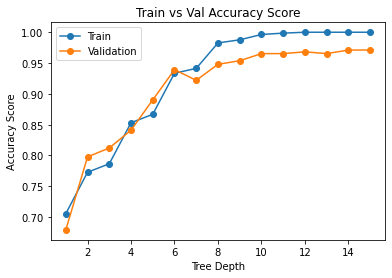

In [20]:
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy Score")
plt.title("Train vs Val Accuracy Score")
plt.plot(depth, train_scores, '-o', label='Train')
plt.plot(depth, val_scores, '-o', label='Validation')
plt.legend()
plt.show()